<a href="https://colab.research.google.com/github/Atharva-Garud/DEC_Lab/blob/main/PD25_Dec_8_K_means_on_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means on Mall_customers.csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering



**Uploading files**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
data = pd.read_csv('Mall_Customers.csv')

print("Dataset:")
print(data.head())



Dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40




---



**Taking important Features and scaling**

In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





---



**Writing a function for visualization**

In [ ]:
def visualize_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()





---



**K-means Clustering**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


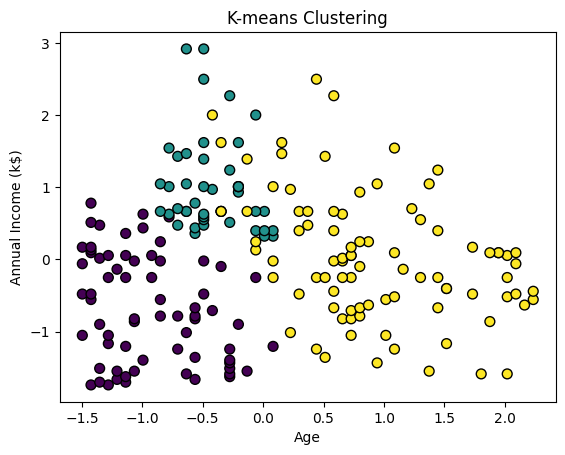

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

visualize_clusters(X_scaled, labels_kmeans, 'K-means Clustering')



---



**Hierarchical Clustering**


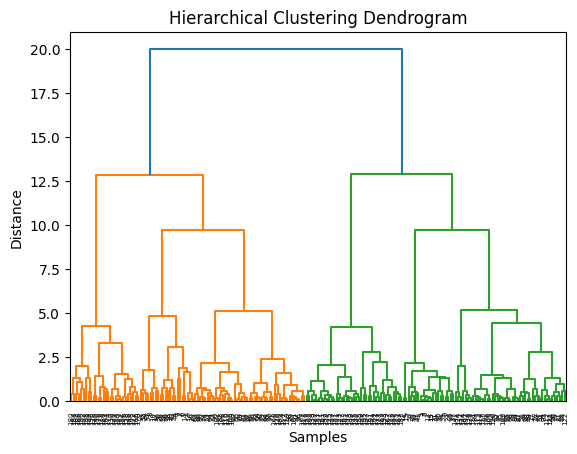

In [ ]:
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



---



**Agglomerative clustering**

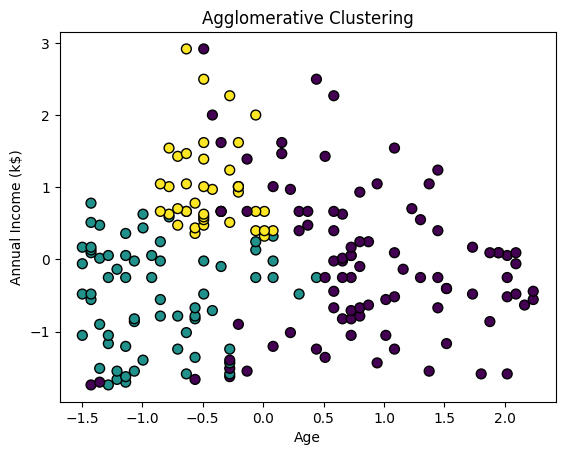

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels_agg = agg_clustering.fit_predict(X_scaled)

visualize_clusters(X_scaled, labels_agg, 'Agglomerative Clustering')



---



**Evaluate the performance of clustering using silhouette score**

In [ ]:
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
silhouette_agg = silhouette_score(X_scaled, labels_agg)

print(f'Silhouette Score - K-means: {silhouette_kmeans:.2f}')
print(f'Silhouette Score - Agglomerative: {silhouette_agg:.2f}')

Silhouette Score - K-means: 0.36
Silhouette Score - Agglomerative: 0.32




---



---

